### **Student Information**  

Gideon Shahar  

Noy Rahmani  
311124416

In [1]:
# imports

from pathlib import Path

import cv2
import numpy as np
import matplotlib.pyplot as plt


data_folder = Path("./data")

In [2]:
# set matplotlib to show images nicely
%matplotlib inline
plt.rcParams['figure.figsize'] = (2, 2)

### Question 1 — Image Reading and Matrix Fundamentals  
#### In this question, you will work with images as matrices and perform basic operations that are fundamental in image processing.


1. **Reading Images (Basics)**  
- Write Python code (using OpenCV or Matplotlib) to read an image (your choice).  
- Display:  
    - The original image  
    - The image shape (height, width, channels)  
    - The image data type
- Convert the image to grayscale and display it.  

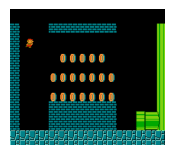

Image shape: (224, 256, 3)
Image data type: uint8


In [3]:
# load image
imname = "mario-bonusarea-a.png"
img = cv2.imread(data_folder / imname)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show orignial image
plt.imshow(img)
plt.axis("off")
plt.show()

# print image shape and date type
print(f"Image shape: {img.shape}")
print(f"Image data type: {img.dtype}")

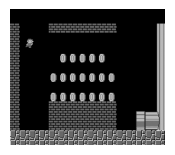

In [4]:
# convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.axis("off")
plt.show()

2. **Image as a Matrix**
- Print a small section of the image matrix (e.g., a 5×5 block of pixel values).  
- Explain what each number represents.  
- Explain the difference between:  
    - RGB image matrix  
    - Grayscale matrix  
    - Binary (thresholded) matrix  


In [5]:
img[24:30,240:245,0]

array([[  0,   0,   0, 128, 128],
       [  0,   0,   0, 128, 128],
       [  0,   0,   0, 128, 128],
       [  0,   0,   0, 128, 128],
       [  0,   0,   0, 128, 128],
       [  0,   0,   0, 128, 128]], dtype=uint8)

In [6]:

rgb_patch = img[25:30, 240:245, 0]
print("RGB patch:")
print(rgb_patch)


RGB patch:
[[  0   0   0 128 128]
 [  0   0   0 128 128]
 [  0   0   0 128 128]
 [  0   0   0 128 128]
 [  0   0   0 128 128]]


2.1.  
Each number represents pixel intensity (of its channel).  
For example, in the matrix above, we can see that in rows 25-30, columns 240-245 (i.e. image coords at this locations) in channel 0 (red),  
some pixels have 0 intensity value (black) and others have value 128 (exactly mid-level intensity)

2.2.  
- An RGB matrix has 3 channels (Red, Green, Blue) while grayscale matrix has only 1 channel.  
- Values in a grayscale matrix represents the different shades of gray. 0 = black and 255 = white.
- Binary matrix consist of only 0s, and 1s. These are corresponding to black and white pixels.

3. **Manual Pixel Manipulation**  
- Change some pixel values manually (e.g., set a region to white or black).  
- Explain how direct manipulation of pixel values affects the displayed image.

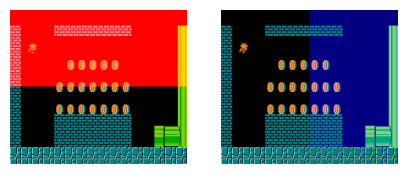

In [7]:

H, W = img.shape[:2]
manipulated_img1 = img.copy()
manipulated_img2 = img.copy()
manipulated_img1[:int(H/2), :, 0] = 255  # increase red channel to the fullest
manipulated_img2[:, int(W/2):, 2] = 128  # mid-level of blue

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
ax[0].imshow(manipulated_img1)
ax[0].axis("off")
ax[1].imshow(manipulated_img2)
ax[1].axis("off")
plt.show()

Increasing values cause the image to have "stronger" shade of the corresponding channel. Decreasing values, and we will get weaker shades until we get 0 which is black.

4. **Creating a Matrix Manually**  
- Create a Python matrix (NumPy array) of size 10×10 with specific patterns:  
    - A diagonal line  
    - A filled square  
    - A gradient from 0 to 255  
- Display these matrices as images.

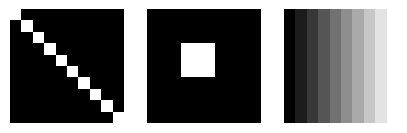

In [8]:
mat = np.zeros((10, 10))

# diagonal line
diagonal_mat = mat.copy()
for i in range(10):
    diagonal_mat[i, i] = 1

# filled square
square_mat = mat.copy()
for i in range(3, 6):
    for j in range(3, 6):
        square_mat[i, j] = 1

# gradient
grad_mat = mat.copy()
for i in range(10):
    grad_mat[i] = np.linspace(0, 255, 10)


# display matrices
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(5, 5))
ax[0].imshow(diagonal_mat, cmap='gray')
ax[0].axis("off")
ax[1].imshow(square_mat, cmap='gray')
ax[1].axis("off")
ax[2].imshow(grad_mat, cmap='gray')
ax[2].axis("off")
plt.show()

5. **Matrix Operations on Images**  
Perform the following operations using NumPy:
- Add a constant value to all pixels (brightness increase)  
- Multiply all pixels by a constant (contrast effect)  
- Clip values to valid range [0, 255]  
- Explain what happens mathematically.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [2.8000000000000003..49.2].


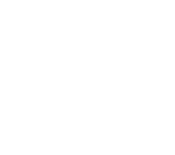

In [9]:
manipulated_img = img + 30
manipulated_img = manipulated_img * 0.2
manipulated_img.clip(0, 255)  

plt.imshow(manipulated_img)
plt.axis("off")
plt.show()